Credit to "https://www.kaggle.com/muonneutrino/mapping-new-york-city-census-data/data"

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

blocks = pd.read_csv('census_block_loc.csv')
census = pd.read_csv('nyc_census_tracts.csv',index_col=0)



In [2]:
blocks.head()

,Latitude,Longitude,BlockCode,County,State
0,40.48,-74.280000,340230076002012,Middlesex,NJ
1,40.48,-74.276834,340230076005000,Middlesex,NJ
2,40.48,-74.273668,340230076003018,Middlesex,NJ
3,40.48,-74.270503,340230076003004,Middlesex,NJ
4,40.48,-74.267337,340230074021000,Middlesex,NJ


In [3]:
census.head()

,County,Borough,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Unemployment
CensusTract,,,,,,,,,,,,,,,,,,,,,
36005000100,Bronx,Bronx,7703,7133,570,29.9,6.1,60.9,0.2,1.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36005000200,Bronx,Bronx,5403,2659,2744,75.8,2.3,16.0,0.0,4.2,...,8.0,22.3,44.8,13.7,38.6,2.9,0.0,0.0,43.0,7.7
36005000400,Bronx,Bronx,5915,2896,3019,62.7,3.6,30.7,0.0,0.3,...,9.0,10.5,41.3,10.0,44.6,1.4,0.5,2.1,45.0,9.5
36005001600,Bronx,Bronx,5879,2558,3321,65.1,1.6,32.4,0.0,0.0,...,4.9,13.8,37.2,5.3,45.5,8.6,1.6,1.7,38.8,8.7
36005001900,Bronx,Bronx,2591,1206,1385,55.4,9.0,29.0,0.0,2.1,...,6.6,11.0,19.2,5.3,63.9,3.0,2.4,6.2,45.4,19.2


In [4]:
blocks = blocks[blocks.County.isin(['Bronx','Kings','New York','Queens','Richmond'])]
blocks['Tract'] = blocks.BlockCode // 10000
blocks = blocks.merge(census,how='left',right_index=True,left_on='Tract')

In [6]:
blocks.head()

,Latitude,Longitude,BlockCode,County_x,State,Tract,County_y,Borough,TotalPop,Men,...,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Unemployment
15,40.48,-74.232513,360859901000011,Richmond,NY,36085990100,Richmond,Staten Island,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,40.48,-74.229347,360859901000011,Richmond,NY,36085990100,Richmond,Staten Island,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,40.48,-74.226181,360859901000011,Richmond,NY,36085990100,Richmond,Staten Island,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,40.48,-74.223015,360859901000011,Richmond,NY,36085990100,Richmond,Staten Island,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,40.48,-74.219849,360859901000011,Richmond,NY,36085990100,Richmond,Staten Island,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
blocks.info()
blocks.Income = pd.to_numeric(blocks.Income,errors='coerce')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18053 entries, 15 to 37111
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Latitude      18053 non-null  float64
 1   Longitude     18053 non-null  float64
 2   BlockCode     18053 non-null  int64  
 3   County_x      18053 non-null  object 
 4   State         18053 non-null  object 
 5   Tract         18053 non-null  int64  
 6   County_y      18052 non-null  object 
 7   Borough       18052 non-null  object 
 8   TotalPop      18052 non-null  float64
 9   Men           18052 non-null  float64
 10  Women         18052 non-null  float64
 11  Hispanic      12999 non-null  float64
 12  White         12999 non-null  float64
 13  Black         12999 non-null  float64
 14  Native        12999 non-null  float64
 15  Asian         12999 non-null  float64
 16  Citizen       18052 non-null  float64
 17  Income        12292 non-null  object 
 18  IncomePerCap  12838 non-n

In [8]:
def convert_to_2d(lats,lons,values):
    latmin = 40.48
    lonmin = -74.28
    latmax = 40.93
    lonmax = -73.65
    lon_vals = np.mgrid[lonmin:lonmax:200j]
    lat_vals = np.mgrid[latmin:latmax:200j]
    map_values = np.zeros([200,200])
    dlat = lat_vals[1] - lat_vals[0]
    dlon = lon_vals[1] - lon_vals[0]
    for lat,lon,value in zip(lats,lons,values):
        lat_idx = int(np.rint((lat - latmin) / dlat))
        lon_idx = int(np.rint((lon-lonmin) / dlon ))        
        if not np.isnan(value):
            map_values[lon_idx,lat_idx] = value
    return lat_vals,lon_vals,map_values

In [9]:
def make_plot(data_values,title='',colors='Greens'):
    lat_vals,lon_vals,values = convert_to_2d(blocks.Latitude,blocks.Longitude,data_values)
    fig = plt.figure(1,figsize=[10,10])
    limits = np.min(lon_vals),np.max(lon_vals),np.min(lat_vals),np.max(lat_vals)
    
    im = plt.imshow(values.T,origin='lower',cmap=colors,extent=limits)
    plt.xlabel('Longitude [degrees]')
    plt.ylabel('Latitude [degrees]')
    plt.title(title)
    plt.colorbar(im,fraction=0.035, pad=0.04)
    
    plt.show()

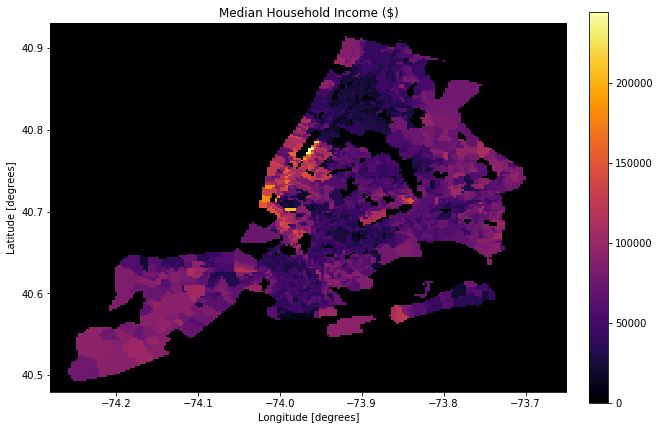

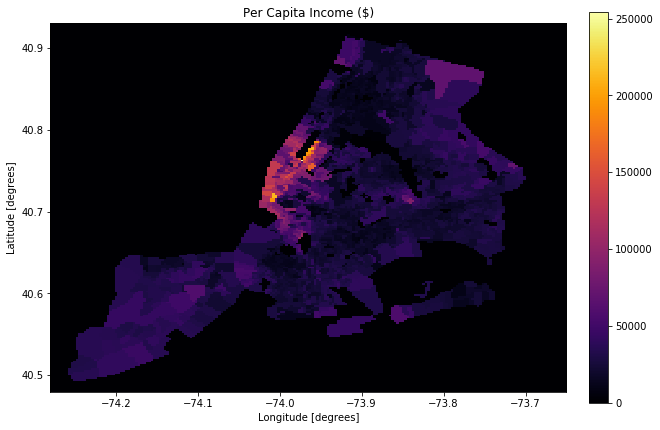

In [10]:
make_plot(blocks.Income,colors='inferno',title='Median Household Income ($)')
make_plot(blocks.IncomePerCap,colors='inferno',title='Per Capita Income ($)')

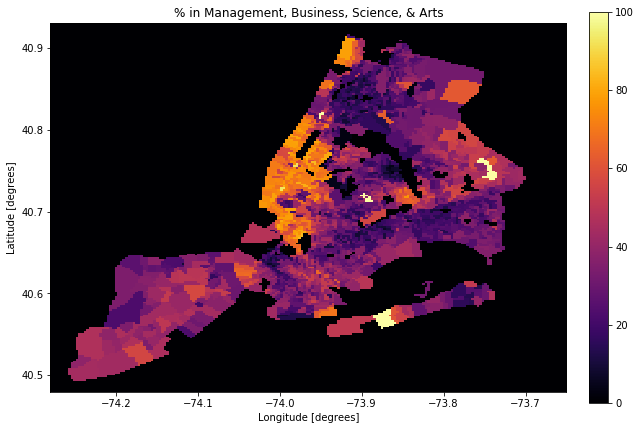

In [11]:
make_plot(blocks.Professional,colors='inferno',title='% in Management, Business, Science, & Arts')